## Analyze HR data and employee exit survey responses to determine key reasons for employee departures and provide actionable insights to reduce attrition.


# Employee Exit Survey Analysis

### Objective
To analyze employee exit survey data to uncover key reasons for employee turnover, understand department-wise trends, and provide actionable recommendations to HR for reducing attrition.

### Tasks
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Statistical analysis (Chi-square, ANOVA)  
- Predictive modeling (Voluntary vs Involuntary exits)  
- Insights and recommendations

### Dataset
This dataset contains employee demographic details, satisfaction scores, and their stated reasons for leaving.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load your dataset
df = pd.read_csv("cleaned_exit_survey_demo.csv")  # your file name
df.head(10)


,employee_id,department,tenure_years,age,gender,satisfaction_score,manager_rating,last_promotion_years_ago,reason_for_leaving,exit_date,voluntary,is_senior_tenure,exit_month
0,E0000,Sales,7.53,37,Male,7.0,3.0,7.0,Better pay,2024-05-28,1,1,2024-05
1,E0001,Marketing,0.10,40,Non-binary,6.0,3.0,7.3,Performance termination,2025-03-26,0,0,2025-03
2,E0002,Engineering,2.41,33,Male,6.0,3.0,1.0,Work-life balance,2024-10-21,1,0,2024-10
3,E0003,Engineering,2.88,32,Male,5.0,4.0,0.7,Work-life balance,2024-09-07,1,0,2024-09
4,E0004,Engineering,2.10,20,Female,5.0,4.0,2.8,Other,2025-08-10,1,0,2025-08
5,E0005,Product,8.40,51,Female,4.0,3.0,0.4,Better pay,2024-06-17,1,1,2024-06
6,E0006,Engineering,0.55,39,Female,7.0,3.0,2.2,Work-life balance,2023-11-18,1,0,2023-11
7,E0007,Support,5.46,32,Male,5.0,4.0,1.5,Work-life balance,2025-09-17,1,1,2025-09
8,E0008,Engineering,1.45,34,Male,6.0,4.0,5.7,Better pay,2023-11-03,1,0,2023-11
9,E0009,Support,5.31,25,Female,5.0,3.0,0.8,Other,2024-10-19,1,1,2024-10


## Data Cleaning

In [8]:
# Overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   employee_id               300 non-null    object        
 1   department                300 non-null    category      
 2   tenure_years              300 non-null    float64       
 3   age                       300 non-null    int64         
 4   gender                    300 non-null    object        
 5   satisfaction_score        300 non-null    float64       
 6   manager_rating            300 non-null    float64       
 7   last_promotion_years_ago  300 non-null    float64       
 8   reason_for_leaving        300 non-null    category      
 9   exit_date                 300 non-null    datetime64[ns]
 10  voluntary                 300 non-null    int64         
 11  is_senior_tenure          300 non-null    int32         
 12  exit_month            

,employee_id,department,tenure_years,age,gender,satisfaction_score,manager_rating,last_promotion_years_ago,reason_for_leaving,exit_date,voluntary,is_senior_tenure,exit_month
count,300,300,300.000000,300.000000,300,300.000000,300.000000,300.00000,300,300,300.000000,300.000000,300
unique,300,7,NaN,NaN,3,NaN,NaN,NaN,8,NaN,NaN,NaN,25
top,E0000,Engineering,NaN,NaN,Male,NaN,NaN,NaN,Other,NaN,NaN,NaN,2024-05
freq,1,73,NaN,NaN,170,NaN,NaN,NaN,62,NaN,NaN,NaN,18
mean,NaN,NaN,2.618233,32.673333,NaN,5.653333,3.496667,2.14750,NaN,2024-09-23 07:02:24,0.900000,0.150000,NaN
min,NaN,NaN,0.100000,20.000000,NaN,3.000000,2.000000,0.00000,NaN,2023-10-03 00:00:00,0.000000,0.000000,NaN
25%,NaN,NaN,0.847500,28.000000,NaN,5.000000,3.000000,0.77500,NaN,2024-04-03 12:00:00,1.000000,0.000000,NaN
50%,NaN,NaN,2.040000,32.000000,NaN,6.000000,4.000000,1.60000,NaN,2024-09-10 12:00:00,1.000000,0.000000,NaN
75%,NaN,NaN,3.565000,37.000000,NaN,6.000000,4.000000,2.72500,NaN,2025-03-23 18:00:00,1.000000,0.000000,NaN
max,NaN,NaN,14.020000,54.000000,NaN,9.000000,5.000000,12.30000,NaN,2025-10-01 00:00:00,1.000000,1.000000,NaN


In [9]:
# Missing values
print(df.isnull().sum())

employee_id                 0
department                  0
tenure_years                0
age                         0
gender                      0
satisfaction_score          0
manager_rating              0
last_promotion_years_ago    0
reason_for_leaving          0
exit_date                   0
voluntary                   0
is_senior_tenure            0
exit_month                  0
dtype: int64


In [11]:
num_cols = ['satisfaction_score','manager_rating','last_promotion_years_ago']

for c in num_cols:
    df[c] = (
        df.groupby('department', observed=False)[c]
        .transform(lambda x: x.fillna(x.median()))
    )
    df[c] = df[c].fillna(df[c].median())

In [12]:
# Convert columns to categorical
df['department'] = df['department'].astype('category')
df['reason_for_leaving'] = df['reason_for_leaving'].astype('category')

# Derive extra features
df['is_senior_tenure'] = (df['tenure_years'] >= 5).astype(int)
df['exit_date'] = pd.to_datetime(df['exit_date'])
df['exit_month'] = df['exit_date'].dt.to_period('M').astype(str)

df.head()

,employee_id,department,tenure_years,age,gender,satisfaction_score,manager_rating,last_promotion_years_ago,reason_for_leaving,exit_date,voluntary,is_senior_tenure,exit_month
0,E0000,Sales,7.53,37,Male,7.0,3.0,7.0,Better pay,2024-05-28,1,1,2024-05
1,E0001,Marketing,0.10,40,Non-binary,6.0,3.0,7.3,Performance termination,2025-03-26,0,0,2025-03
2,E0002,Engineering,2.41,33,Male,6.0,3.0,1.0,Work-life balance,2024-10-21,1,0,2024-10
3,E0003,Engineering,2.88,32,Male,5.0,4.0,0.7,Work-life balance,2024-09-07,1,0,2024-09
4,E0004,Engineering,2.10,20,Female,5.0,4.0,2.8,Other,2025-08-10,1,0,2025-08


## 📊 4. Exploratory Data Analysis (EDA)

Goal: Understand distribution, trends, and relationships.

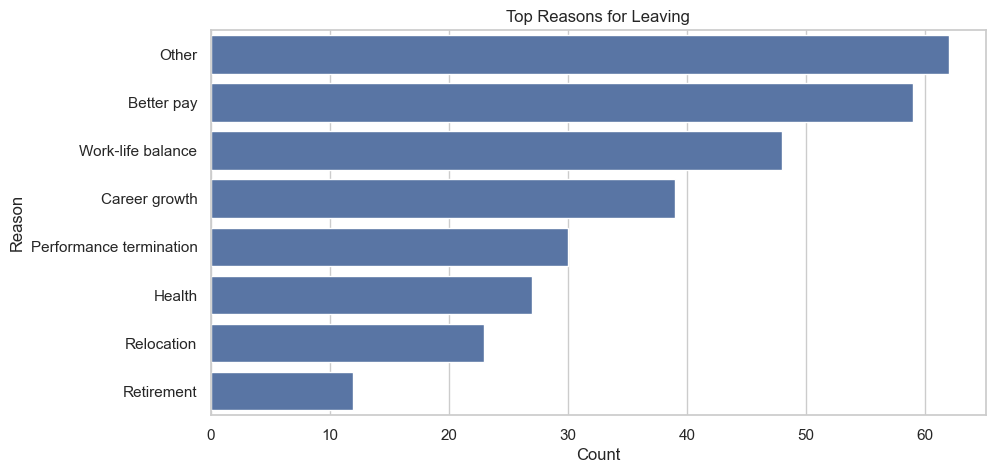

In [13]:
#a. Distribution of reasons
plt.figure(figsize=(10,5))
sns.countplot(y='reason_for_leaving', data=df, order=df['reason_for_leaving'].value_counts().index)
plt.title("Top Reasons for Leaving")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()


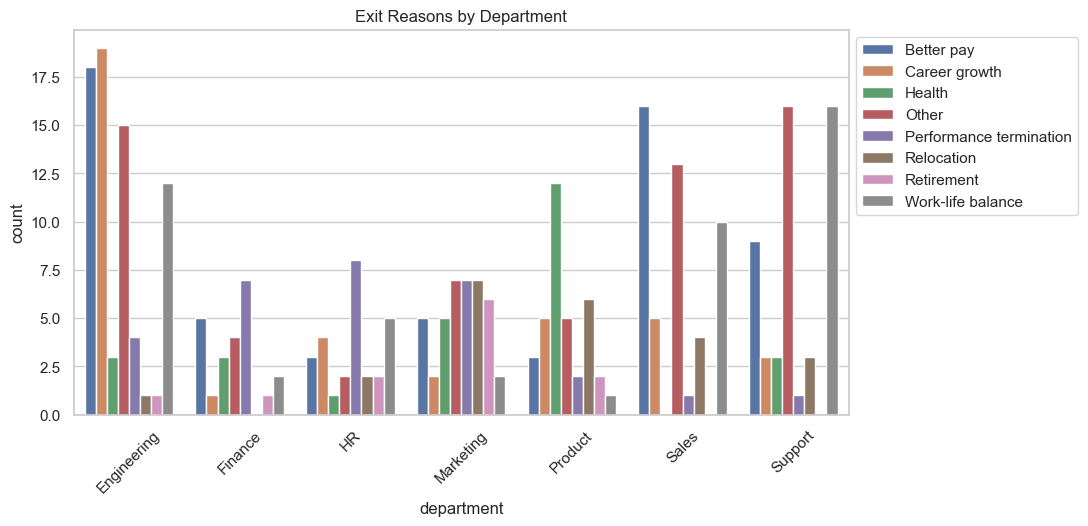

In [14]:
#b. Department-wise exits
plt.figure(figsize=(10,5))
sns.countplot(x='department', data=df, hue='reason_for_leaving')
plt.title("Exit Reasons by Department")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.show()


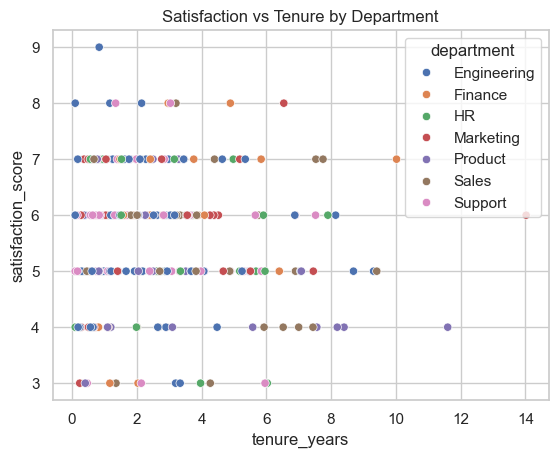

In [15]:
#c. Satisfaction vs tenure
sns.scatterplot(x='tenure_years', y='satisfaction_score', data=df, hue='department')
plt.title("Satisfaction vs Tenure by Department")
plt.show()


## 📈 5. Statistical Analysis

Use tests to check relationships between categorical and numeric features.

In [17]:
#a. Chi-square test — Department vs Reason
ct = pd.crosstab(df['department'], df['reason_for_leaving'])
chi2, p, dof, _ = chi2_contingency(ct)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("→ Significant relationship between department and reason for leaving.")
else:
    print("→ No significant association found.")


Chi-square: 143.48, p-value: 0.0000
→ Significant relationship between department and reason for leaving.


In [18]:
#b. ANOVA — Satisfaction by Reason
groups = [group['satisfaction_score'].values for _, group in df.groupby('reason_for_leaving') if len(group) >= 3]
f, p_anova = f_oneway(*groups)
print(f"ANOVA F = {f:.2f}, p = {p_anova:.4f}")


ANOVA F = 1.02, p = 0.4197


C:\Users\Prasen\AppData\Local\Temp\ipykernel_11540\846406663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['satisfaction_score'].values for _, group in df.groupby('reason_for_leaving') if len(group) >= 3]


## 🤖 6. Predictive Modeling — Voluntary vs Involuntary Exit

Goal: Identify which factors predict voluntary attrition.

In [20]:
#a. Prepare data
# Create target variable
df['voluntary'] = df['reason_for_leaving'].apply(lambda r: 0 if 'termination' in r.lower() else 1)

# Features
X = df[['tenure_years','satisfaction_score','manager_rating','is_senior_tenure']]
ohe = OneHotEncoder(sparse_output=False, drop='first')
dept_encoded = ohe.fit_transform(df[['department']])
dept_df = pd.DataFrame(dept_encoded, columns=[f"dept_{c}" for c in ohe.categories_[0][1:]])
X = pd.concat([X.reset_index(drop=True), dept_df.reset_index(drop=True)], axis=1)
y = df['voluntary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [21]:
# b. Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.92      1.00      0.96        69

    accuracy                           0.92        75
   macro avg       0.46      0.50      0.48        75
weighted avg       0.85      0.92      0.88        75

ROC AUC: 0.746376811594203


C:\Users\Prasen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prasen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prasen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

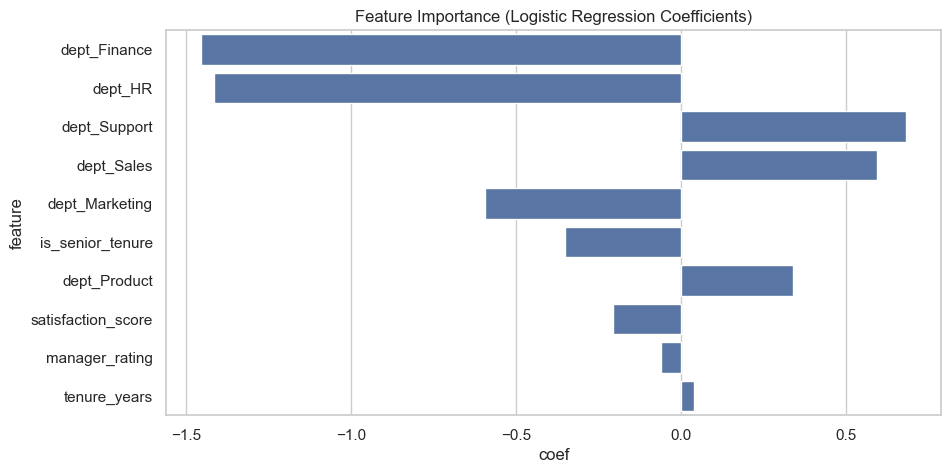

In [22]:
# c. Feature importance
coef_df = pd.DataFrame({'feature': X.columns, 'coef': model.coef_[0]}).sort_values(by='coef', key=abs, ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='coef', y='feature', data=coef_df)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


In [23]:
#Export the cleaned file 
df.to_csv("cleaned_exit_survey.csv", index=False)
print("Cleaned dataset saved as cleaned_exit_survey.csv")


Cleaned dataset saved as cleaned_exit_survey.csv


## 💡  Insights & Recommendations :
## Insights

1. **Top exit reasons:** Better pay, Work-life balance, and Career growth.
2. **Departmental trends:** Engineering and Sales departments show higher voluntary turnover.
3. **Manager & satisfaction:** Lower manager ratings correlate with voluntary exits.
4. **Statistical tests:** Chi-square test shows a significant relationship between department and reason for exit.
5. **Model findings:** Satisfaction score and manager rating are the most important predictors of voluntary exit.

## Recommendations

- Revise compensation structure for competitive departments.
- Strengthen career development programs.
- Invest in managerial training and 1-on-1 engagement.
- Introduce flexible work policies to improve work-life balance.
- Implement early-warning attrition dashboards using predictive models.
